In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ising1d import (compute_energy1d, run_ising1d, compute_magnetisation1d,run_iteration1d)

def plot_state(state):
    state_for_plotting = np.tile((state + 1) / 2, (10,1))
    plt.figure()
    plt.imshow(state_for_plotting, cmap='gray', vmin=0, vmax=1)

In [4]:
run_ising1d(T=10, N=100, neq = 200000, nsamples=10, navg=5, evaluate_functions=[compute_magnetisation1d, compute_energy1d])[1:]

(array([18.8, -1.6, 18.4, -6. ,  1.2, -1.6, -0.8,  0.8, -9.2,  8.8]),
 array([-16.8,  -5.6, -12.8,  -8.8,   5.6,   0. ,   9.6, -11.2, -20. ,
         -4.8]))

In [3]:
state_test = np.array([[1,1,-1,1],[-1,1,1,-1]])
compute_energy1d(state_test)
compute_magnetisation1d(state_test).shape
state_test.shape

(2, 4)

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]]


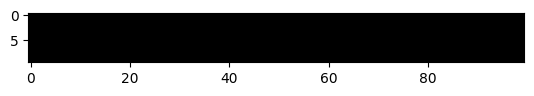

In [61]:
final_stateT05 = run_ising1d(N=100, T=0.5, neq=200000, navg=0)[0]
plot_state(final_stateT05)
print(final_stateT05)

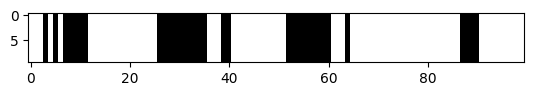

In [31]:

final_stateT1 = run_ising1d(N=100, T=1, neq=100000)[0]
plot_state(final_stateT1)

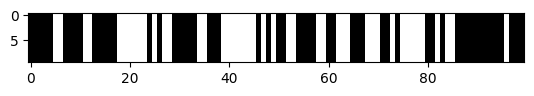

In [32]:
final_stateT2 = run_ising1d(N=100, T=2, neq=100000)[0]
plot_state(final_stateT2)

In [21]:
# temperatures = np.logspace(-1, 1.5, 20)
# energies_T = []
# delta_energies_T = []
# for t in temperatures:
#     energies = []
#     for i in range(5):
#         (states, magnetisation, energy) = run_ising1d(T=t, N=100, niters = 200000, nsamples=10000, evaluate_functions=[sum, compute_energy1d])
#         energies.append(np.mean(energy))
#     energies_T.append(np.mean(energies))
#     delta_energies_T.append(np.std(energies) / len(energies))
N=100
neq = 200000
nsamples = 30
navg = 10000
npoints = 10


Ts = np.logspace(-1, 1.5, npoints)
Ms = np.zeros(npoints)
Es = np.zeros(npoints)
delta_Ms = np.zeros(npoints)
delta_Es = np.zeros(npoints)

for (i, t) in enumerate(Ts):
    (state, m, e) = run_ising1d(T=t, N=N, neq = neq, nsamples=nsamples, navg=navg, evaluate_functions=[compute_magnetisation1d, compute_energy1d])
    
    Ms[i] = np.mean(m) / N
    delta_Ms[i] = np.std(m) / np.sqrt(N) / N

    Es[i] = np.mean(e) / N
    delta_Es[i] = np.std(e) / np.sqrt(N) / N

In [11]:
print(Ts)
print(Es)
print(delta_Es)

[ 0.1         0.18957357  0.35938137  0.68129207  1.29154967  2.44843675
  4.64158883  8.79922544 16.68100537 31.6227766 ]
[-1.        -1.        -0.9956752 -0.8936648 -0.6491584 -0.3891208
 -0.211348  -0.1155276 -0.0596552 -0.0344668]
[0.         0.         0.00119306 0.00196655 0.00150185 0.00082224
 0.00081962 0.00070968 0.00080318 0.0006439 ]


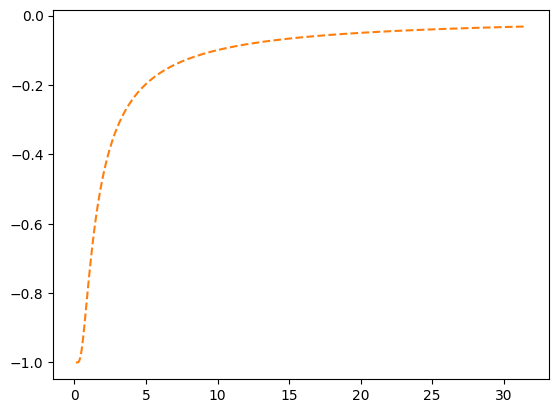

In [66]:
plt.figure()


x_exact = np.logspace(-1,1.5, 101)
y_exact = -np.tanh(1/x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

# plt.errorbar(Ts, Es, yerr=delta_Es, fmt='.',markersize=5, color='C0')
# plt.xscale('log')




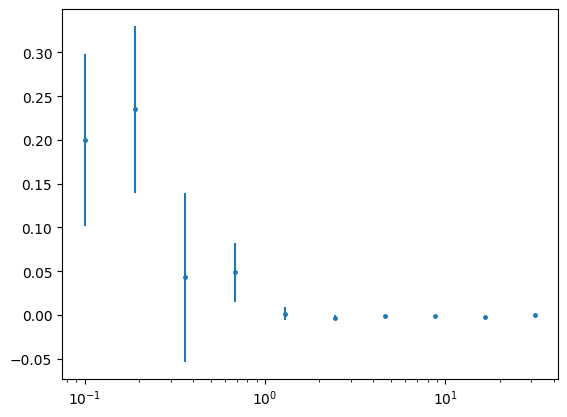

In [23]:
plt.figure()


plt.errorbar(Ts, Ms, yerr=delta_Ms, fmt='.',markersize=5, color='C0')
plt.xscale('log')

In [67]:
def U_exact(T):
    return -np.tanh(1/T)

def c_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return epsilon**2 * beta / (T * np.cosh(beta * epsilon)**2)

C:\Users\niked\AppData\Local\Temp\ipykernel_4992\1230572464.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return -np.tanh(1/T)


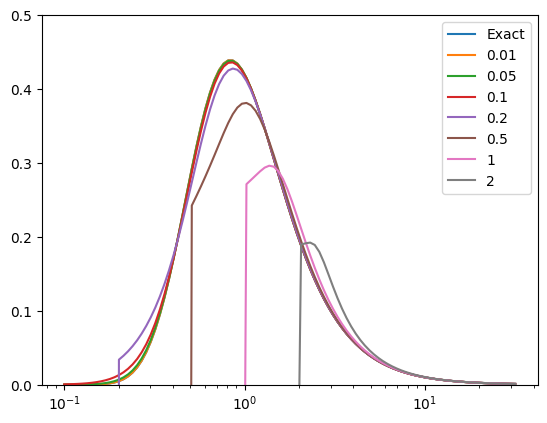

In [170]:
npoints=100
Ts = np.logspace(-1, 1.5, npoints)
deltaT = 0.1

deltaTs = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2]


Cs = np.zeros((npoints, len(deltaTs)))
for (j,dt) in enumerate(deltaTs):
    for (i,T) in enumerate(Ts):
        e1 = U_exact(T-dt)
        e2 = U_exact(T+dt)

        Cs[i,j] = (e2 - e1) / (2*dt)

# print(0.05*Ts)

plt.figure()
plt.plot(Ts, c_exact(Ts), label="Exact")
plt.plot(Ts, Cs, label=deltaTs)
plt.xscale('log')
plt.ylim([0,0.5])
plt.legend()


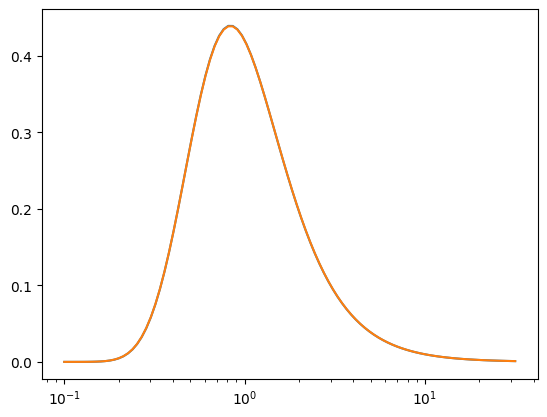

In [190]:
npoints=100
Ts = np.logspace(-1, 1.5, npoints)
deltaT = 0.1

# deltaTs = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 2]


Cs = np.zeros(npoints)

for (i, T) in enumerate(Ts):
    if t < 1:
        dt = 0.05
    else:
        dt = 0.05*T
    # elif T < 1:
    #     dt = 0.05
    # elif T < 2:
    #     dt=0.2
    # elif T < 5:
    #     dt=0.5
    # elif T < 10:
    #     dt = 1
    # else:
    #     dt = 2
    e1 = U_exact(T-dt)
    e2 = U_exact(T+dt)

    Cs[i] = (e2 - e1) / (2*dt)


plt.figure()
plt.plot(Ts, c_exact(Ts), label="Exact")
plt.plot(Ts, Cs)
plt.xscale('log')

In [ ]:
# Heat Capacity
N=100
neq = 200000
nsamples = 50
navg = 10000
npoints = 10


Ts = np.logspace(-1, 1.5, npoints)
Cs = np.zeros(npoints)
delta_Cs = np.zeros(npoints)

dt = 0.05

for (i, T) in enumerate(Ts):   
    if T < 1:
        dt = 0.05
    else:
        dt = 0.05*T
        
    (_, e1) = run_ising1d(T=T-dt, N=N, neq = neq, nsamples=nsamples, navg=navg, evaluate_functions=[compute_energy1d])
    (_, e2) = run_ising1d(T=T+dt, N=N, neq = neq, nsamples=nsamples, navg=navg, evaluate_functions=[compute_energy1d])
    
    c = (e2 - e1) / (2*dt)
    Cs[i] = np.mean(c) / N
    delta_Cs[i] = np.std(c) / np.sqrt(N) / N

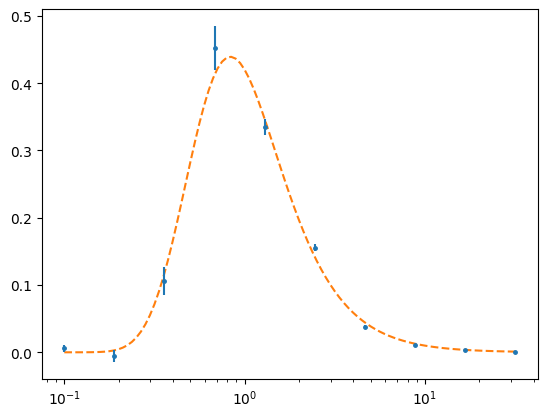

In [192]:
def c_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return epsilon**2 * beta / (T * np.cosh(beta * epsilon)**2)

plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = c_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

# plt.plot(temperatures, np.array(Cs)/N, '.',markersize=5, color='C0')
plt.errorbar(Ts, np.array(Cs), np.array(delta_Cs), fmt='.',markersize=5, color='C0')
plt.xscale('log')

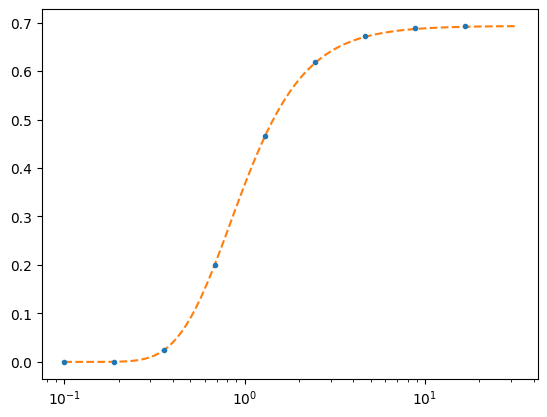

In [218]:
npoints = 46
Ts = np.logspace(-1,1.5,npoints)

Ss = np.zeros(npoints)
Ss[0] = 0#np.log(2)
for i in range(1,npoints):
    Ss[i] = Ss[i-1] + (U_exact(Ts[i]) - U_exact(Ts[i-1])) * (Ts[i] + Ts[i-1]) / (2*Ts[i]*Ts[i-1])

def s_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return (epsilon / T * (1 - np.tanh(beta*epsilon)) + k * np.log(1+np.exp(-2*beta*epsilon)))


plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = s_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.plot(Ts[0:-1:5], Ss[0:-1:5], '.')
# plt.errorbar(temperatures, entropies/N, fmt='.',markersize=5, color='C0')
plt.xscale('log')


In [ ]:
N=100
neq = 200000
nsamples = 10 # Increase to 50 eventually
navg = 10000
npoints = 46


Ts = np.logspace(-1, 1.5, npoints)
Es = np.zeros((nsamples, npoints))


for (i, t) in enumerate(Ts):
    (state, e) = run_ising1d(T=t, N=N, neq = neq, nsamples=nsamples, navg=navg, evaluate_functions=[compute_energy1d])

    Es[:,i] = e / N

[ 0.69314718  0.69314718  0.69314718  0.69314718  1.82679497  0.69314718
  0.69314718 20.52631898  0.69314718  0.69314718]
0.5921816515277949
2.789829138580563


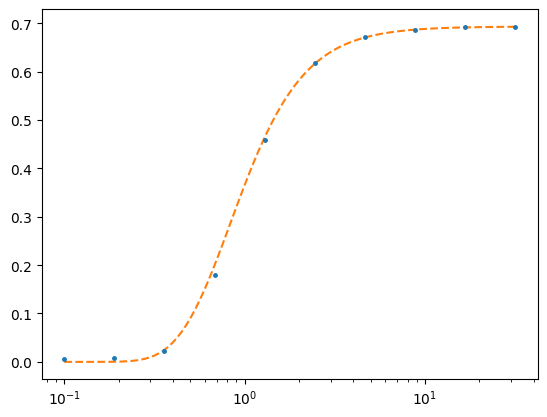

In [256]:
Ss = np.zeros((nsamples,npoints))
delta_Ss = np.zeros(npoints)

Ss[:,0] = np.log(2)
for i in range(1,npoints):
    Ss[:,i] = Ss[:,i-1] + (Es[:,i] - Es[:,i-1]) * (Ts[i] + Ts[i-1]) / (2*Ts[i]*Ts[i-1])

def s_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return (epsilon / T * (1 - np.tanh(beta*epsilon)) + k * np.log(1+np.exp(-2*beta*epsilon)))

Ss_averaged = np.mean(Ss, axis=0)
delta_Ss = np.std(Ss, axis=0) / np.sqrt(N)

plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = s_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(Ts[::5], Ss_averaged[::5]/N, yerr=delta_Ss[::5]/N, fmt='.',markersize=5, color='C0')
plt.xscale('log')
print(Ss[:,6])
print(delta_Ss[6])
print(Ss_averaged[6])

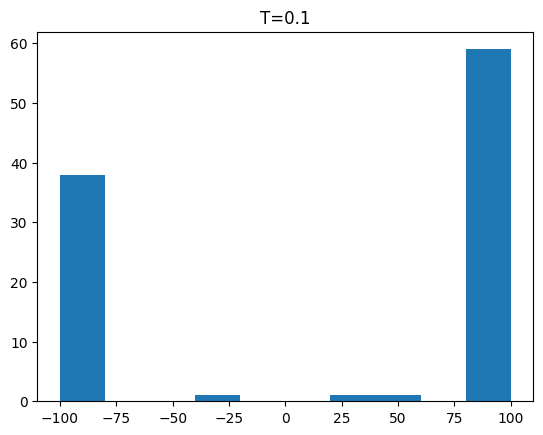

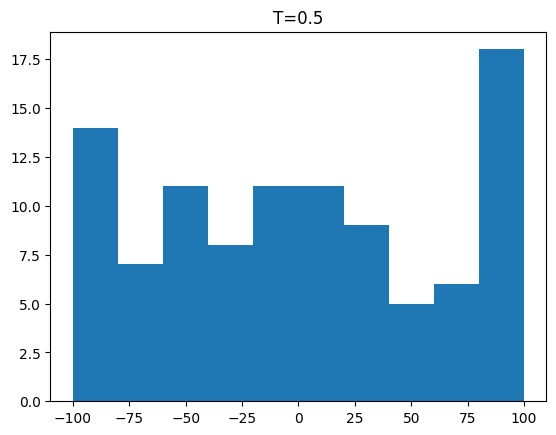

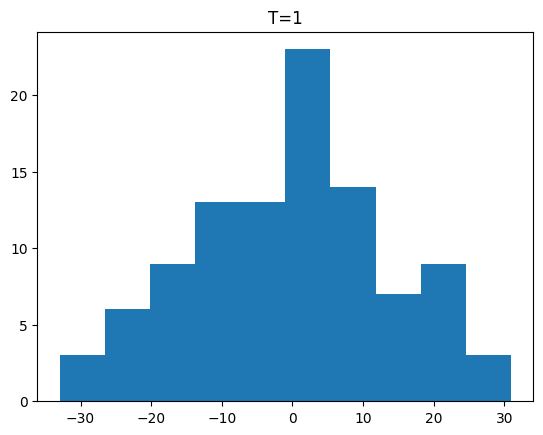

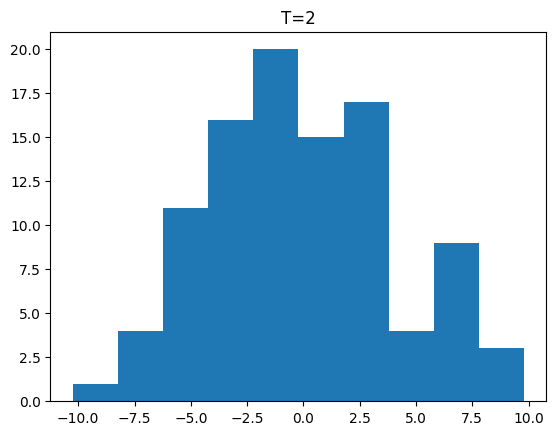

In [276]:
# Average magnetisation histograms
N=100
neq = 200000
nsamples = 100
navg = 10000
npoints = 10

Ms = np.zeros((4,nsamples))

Ts = [0.1, 0.5, 1, 2]
for (i,T) in enumerate(Ts):
    (state, Ms[i,:]) = run_ising1d(T=T, N=N, neq = neq, nsamples=nsamples, navg=navg, evaluate_functions=[compute_magnetisation1d])
    plt.figure()
    plt.hist(Ms[i,:])
    plt.title(f"T={T}")


(array([1., 0., 1., 1., 1., 1., 3., 0., 0., 2.]),
 array([-377.817  , -325.90142, -273.98584, -222.07026, -170.15468,
        -118.2391 ,  -66.32352,  -14.40794,   37.50764,   89.42322,
         141.3388 ]),
 <BarContainer object of 10 artists>)

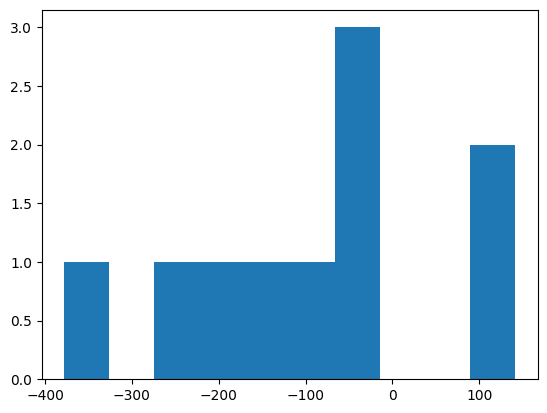

In [274]:
plt.hist(Ms)

In [49]:
entropies = np.zeros(len(energies))

entropies[0] = np.log(2)
for i in range(1,npoints):
    entropies[i] = entropies[i-1] + (energies[i] - energies[i-1]) * (temperatures[i] + temperatures[i-1]) / (2*temperatures[i]*temperatures[i-1])

    

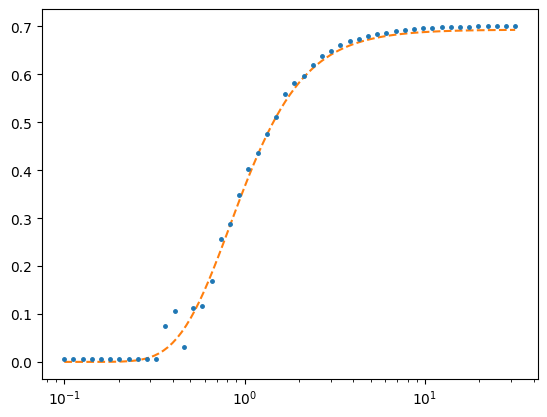

In [50]:
def s_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return (epsilon / T * (1 - np.tanh(beta*epsilon)) + k * np.log(1+np.exp(-2*beta*epsilon)))


plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = s_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, entropies/N, fmt='.',markersize=5, color='C0')
plt.xscale('log')


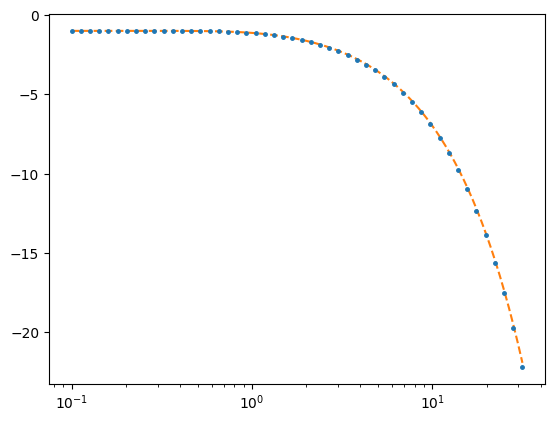

In [51]:
fs = energies - temperatures * entropies

def f_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return -epsilon - k * T * np.log(1+np.exp(-2*epsilon*beta))



plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = f_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, fs/N, fmt='.',markersize=5, color='C0')
plt.xscale('log')

In [3]:

# Heat Capacity
N=100
niters = 200000
nsamples = 50000
npoints = 10
navg = 10


Cs = []
Delta_Cs = []
dt = 0.05

Cs3 = []
Delta_Cs3 = []

E1s = []
E2s = []
Delta_E1s = []
Delta_E2s = []
for t in temperatures:
    e1s = []
    e2s = []
    cs = []
    cs3 = []
    for i in range(navg):
        (state, e1) = run_ising1d(T=t-dt, N=N, niters = niters, nsamples=nsamples, evaluate_functions=[compute_energy1d])
        (state, e2) = run_ising1d(T=t+dt, N=N, niters = niters, nsamples=nsamples, evaluate_functions=[compute_energy1d])
        e1s.append(np.mean(e1))
        e2s.append(np.mean(e2))
        cs.append((np.mean(e2) - np.mean(e1))/(2*dt))
        cs3.append((np.mean(np.array(e1)**2) - np.mean(e1)**2)/(t**2))
    E1s.append(np.mean(e1s))
    E2s.append(np.mean(e2s))

    Delta_E1s.append(np.std(e1s) / np.sqrt(len(e1s)))
    Delta_E2s.append(np.std(e2s) / np.sqrt(len(e2s)))

    Cs.append(np.mean(cs))
    Delta_Cs.append(np.std(cs)/np.sqrt(len(cs)))

    Cs3.append(np.mean(cs3))
    Delta_Cs3.append(np.std(cs3)/np.sqrt(len(cs3)))

    
Cs2 = (np.array(E2s) - np.array(E1s)) / (2*dt)
Delta_Cs2 = np.sqrt(np.array(Delta_E1s)**2 + np.array(Delta_E2s)**2) / (2*dt)



NameError: name 'temperatures' is not defined

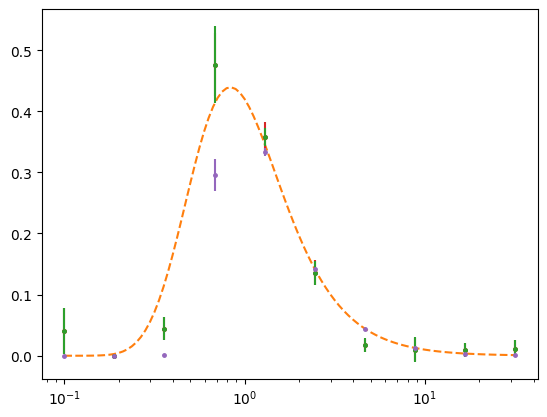

In [56]:
# print(type(energies))
# print(type(energy_squareds))
# print(type(temperatures))

# Cs = (np.array(energy_squareds) - np.array(energies)**2) / (temperatures**2)
DeltaCs = np.sqrt(np.array(Delta_E1s)**2 + np.array(Delta_E2s)**2) / (2*dt)

def c_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return epsilon**2 * beta / (T * np.cosh(beta * epsilon)**2)

# Cs2 = np.zeros(len(temperatures))
# Cs2[0] = (energies[1] - energies[0]) / (temperatures[1]-temperatures[0])
# for i in range(1,len(Cs2)-1):
#     Cs2[i] = (energies[i+1] - energies[i]) / (temperatures[i+1]-temperatures[i])
# Cs2[-1] = (energies[-1] - energies[-2]) / (temperatures[-1] - temperatures[-2])


plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = c_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

# plt.plot(temperatures, np.array(Cs)/N, '.',markersize=5, color='C0')
plt.errorbar(temperatures, np.array(Cs2)/N, np.array(Delta_Cs2)/N, fmt='.',markersize=5, color='C3')
plt.errorbar(temperatures, np.array(Cs)/N, np.array(Delta_Cs)/N, fmt='.',markersize=5, color='C2')
plt.errorbar(temperatures, np.array(Cs3)/N, np.array(Delta_Cs3)/N, fmt='.',markersize=5, color='C4')
plt.xscale('log')